In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers import split_WoS_category

In [50]:
sample_n = 5

In [51]:
df = pd.read_csv('output/shared_citations.csv')
df['WoS Categories'] = df['WoS Categories'].apply(split_WoS_category)
df_exploded = df.explode('WoS Categories')
category_counts = pd.DataFrame(df_exploded['WoS Categories'].value_counts())
category_counts = pd.DataFrame(category_counts).reset_index()
category_counts.sort_values(by='count', ascending=False, inplace=True)
category_counts.sort_values(by='count', ascending=True, inplace=True)

Text(0.5, 0, 'number of publications')

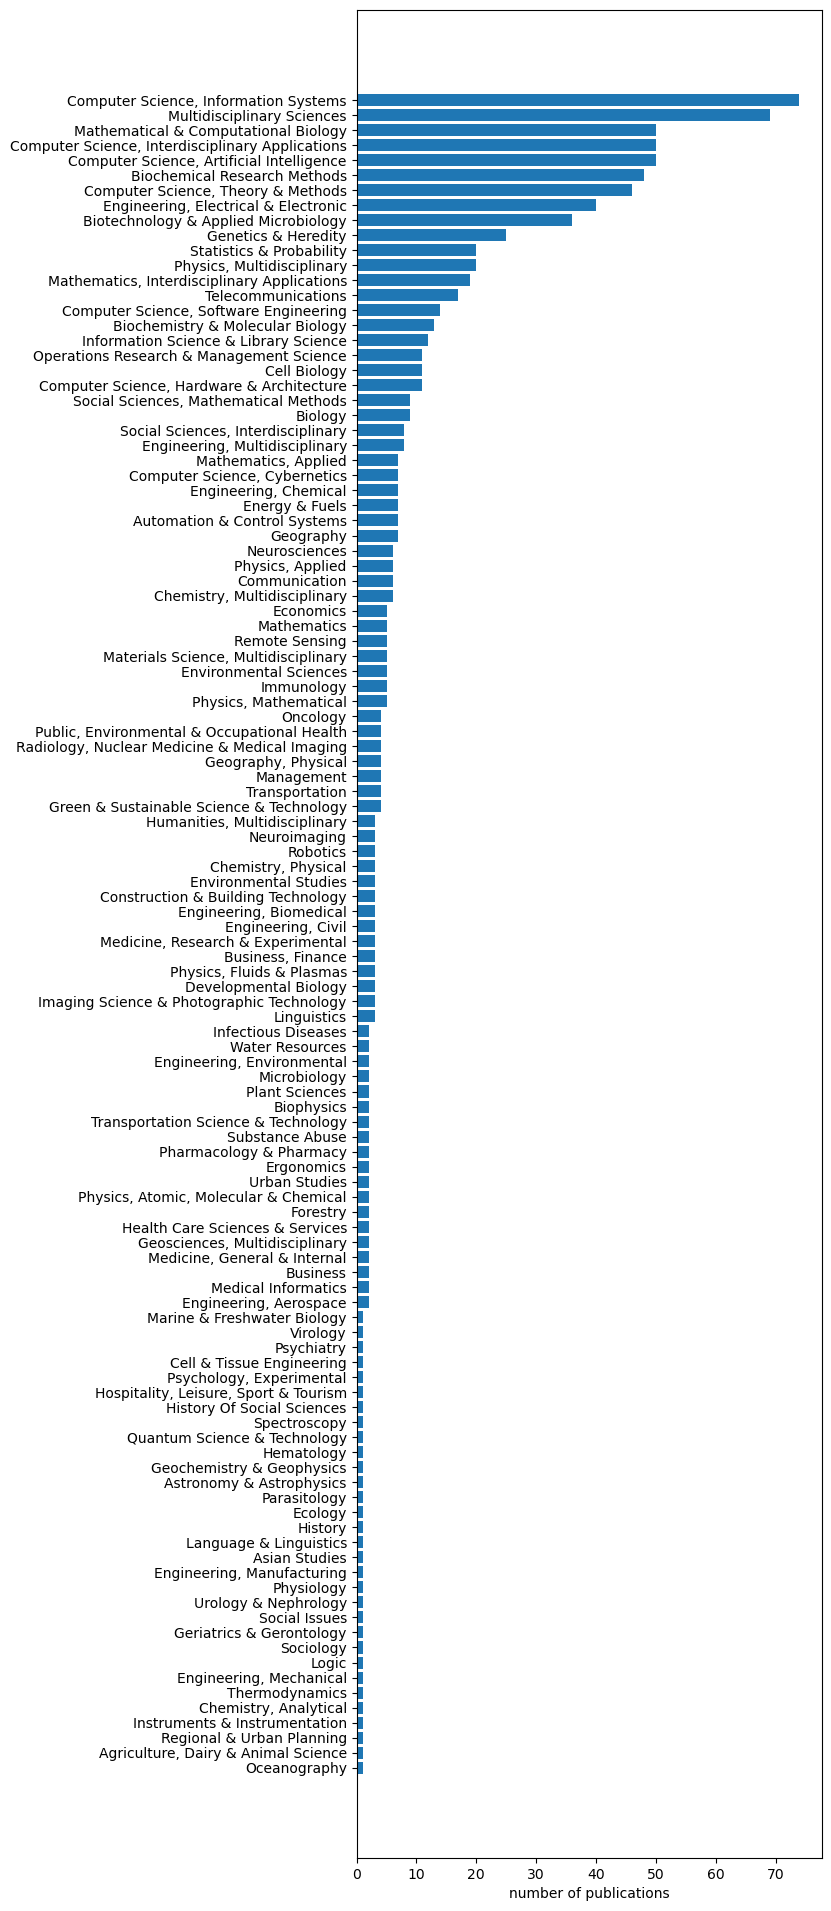

In [52]:
plt.figure(figsize=(6, 24))
plt.barh(y=list(category_counts['WoS Categories']), width=category_counts['count'])
plt.xlabel("number of publications")

In [53]:
category_counts

,WoS Categories,count
111,Oceanography,1
104,"Agriculture, Dairy & Animal Science",1
98,Regional & Urban Planning,1
100,Instruments & Instrumentation,1
101,"Chemistry, Analytical",1
...,...,...
3,"Computer Science, Artificial Intelligence",50
4,"Computer Science, Interdisciplinary Applications",50
2,Mathematical & Computational Biology,50
1,Multidisciplinary Sciences,69


In [54]:
sample = []
category_name_l = []

for i in range(11, len(category_counts)):
    category_name = category_counts['WoS Categories'][i]
    if len(df_exploded.loc[(df_exploded['WoS Categories'] == category_name)]) >= sample_n:
        category_name_l.extend([category_name] * sample_n)
        sample.append(df_exploded.loc[(df_exploded['WoS Categories'] == category_name)].sample(n=sample_n, random_state=42))
        
sample_df = pd.concat(sample)
sample_df['Category Sampling Basis'] = category_name_l

In [55]:
sample_df.shape

(150, 73)

In [56]:
sample_df.drop_duplicates(inplace=True)

In [57]:
sample_df.shape

(150, 73)

In [58]:
sample_df.to_csv('output/sample_all_pub.csv', index=False)